$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 6$
---
Pawel Bryzek, gr.1A
---

# 6.1 Load IMDB reviews dataset

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

ds_train = tfds.load('imdb_reviews', split='train', as_supervised=True, shuffle_files=False)
ds_test = tfds.load('imdb_reviews', split='test', as_supervised=True, shuffle_files=False)


Examine the content - we prefer texts and label values to tensors

In [2]:
import pandas as pd

df_train = pd.DataFrame(ds_train.take(10))
df_train.head()


,0,1
0,"tf.Tensor(b""This was an absolutely terrible mo...","tf.Tensor(0, shape=(), dtype=int64)"
1,tf.Tensor(b'I have been known to fall asleep d...,"tf.Tensor(0, shape=(), dtype=int64)"
2,tf.Tensor(b'Mann photographs the Alberta Rocky...,"tf.Tensor(0, shape=(), dtype=int64)"
3,tf.Tensor(b'This is the kind of film for a sno...,"tf.Tensor(1, shape=(), dtype=int64)"
4,"tf.Tensor(b'As others have mentioned, all the ...","tf.Tensor(1, shape=(), dtype=int64)"


In [3]:
data = [(text.numpy().decode('UTF8'),label.numpy()) for text,label in ds_train]
df_train = pd.DataFrame(data,columns=['text','label'])
df_train.head(len(df_train))


,text,label
0,This was an absolutely terrible movie. Don't b...,0
1,"I have been known to fall asleep during films,...",0
2,Mann photographs the Alberta Rocky Mountains i...,0
3,This is the kind of film for a snowy Sunday af...,1
4,"As others have mentioned, all the women that g...",1
...,...,...
24995,"I have a severe problem with this show, severa...",0
24996,"The year is 1964. Ernesto ""Che"" Guevara, havin...",1
24997,Okay. So I just got back. Before I start my re...,0
24998,When I saw this trailer on TV I was surprised....,0


How many labels and what is the class distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb43d2ed0>]],
      dtype=object)

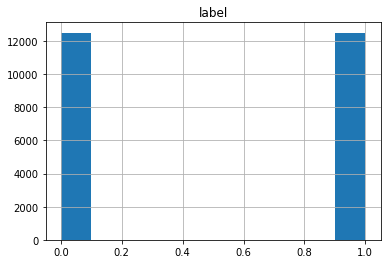

In [4]:
df_train.hist()

In [5]:
data = [(text.numpy().decode('UTF8'),label.numpy()) for text,label in ds_test]
df_test = pd.DataFrame(data,columns=['text','label'])
df_test.head(len(df_test))


,text,label
0,There are films that make careers. For George ...,1
1,"A blackly comic tale of a down-trodden priest,...",1
2,"Scary Movie 1-4, Epic Movie, Date Movie, Meet ...",0
3,Poor Shirley MacLaine tries hard to lend some ...,0
4,As a former Erasmus student I enjoyed this fil...,1
...,...,...
24995,"Feeling Minnesota is not really a road movie, ...",0
24996,"This is, without doubt, one of my favourite ho...",1
24997,Most predicable movie I've ever seen...extreme...,0
24998,It's exactly what I expected from it. Relaxing...,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb42eab10>]],
      dtype=object)

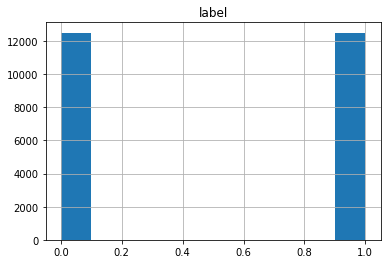

In [6]:
df_test.hist()

# 6.2 Text preprocessing

Text preprocessing involves
*  cleaning
*  extracting tokens (words, bigrams, trigrams, sometimes character based tokens)
*  counting tokens, converting documents to the bag-of-words representation
*  for frequency based representations: scaling
*  padding sequences in the case of neural networks



## CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

input = """Incy Wincy spider went up the water spout
Down came the rain and washed the spider out
Out came the sun and dried up all the rain
And the Incy Wincy spider went up the spout again
Incy Wincy spider went up the water spout
Down came the rain and washed the spider out
Out came the sun and dried up all the rain
And the Incy Wincy spider went up the spout again"""
corpus=input.split('\n')
print(corpus)

vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X = vectorizer.transform(corpus)


['Incy Wincy spider went up the water spout', 'Down came the rain and washed the spider out', 'Out came the sun and dried up all the rain', 'And the Incy Wincy spider went up the spout again', 'Incy Wincy spider went up the water spout', 'Down came the rain and washed the spider out', 'Out came the sun and dried up all the rain', 'And the Incy Wincy spider went up the spout again']


What is X? Looks like a sparse matrix...

In [8]:
print(X.shape)
print(X)

(8, 18)
  (0, 6)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
  (0, 13)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 12)	2
  (1, 14)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (2, 7)	1
  (2, 8)	1
  (2, 11)	1
  (2, 12)	2
  (2, 13)	1
  :	:
  (5, 3)	1
  (5, 4)	1
  (5, 7)	1
  (5, 8)	1
  (5, 9)	1
  (5, 12)	2
  (5, 14)	1
  (6, 1)	1
  (6, 2)	1
  (6, 3)	1
  (6, 5)	1
  (6, 7)	1
  (6, 8)	1
  (6, 11)	1
  (6, 12)	2
  (6, 13)	1
  (7, 0)	1
  (7, 2)	1
  (7, 6)	1
  (7, 9)	1
  (7, 10)	1
  (7, 12)	2
  (7, 13)	1
  (7, 16)	1
  (7, 17)	1


In [9]:
Y=X.toarray()
print(Y)
print(vectorizer.vocabulary_)


[[0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]
 [0 0 1 1 1 0 0 1 1 1 0 0 2 0 1 0 0 0]
 [0 1 1 1 0 1 0 1 1 0 0 1 2 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 1 1 0 2 1 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]
 [0 0 1 1 1 0 0 1 1 1 0 0 2 0 1 0 0 0]
 [0 1 1 1 0 1 0 1 1 0 0 1 2 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 1 1 0 2 1 0 0 1 1]]
{'incy': 6, 'wincy': 17, 'spider': 9, 'went': 16, 'up': 13, 'the': 12, 'water': 15, 'spout': 10, 'down': 4, 'came': 3, 'rain': 8, 'and': 2, 'washed': 14, 'out': 7, 'sun': 11, 'dried': 5, 'all': 1, 'again': 0}


## TF-IDF conversion

Tfidf - term frequency inverse document frequency assignes smaller weights to terms appering often in a set of documents. See [Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

$tf(t,d)=\frac{\#occurences\,of\, t\, in\, d}{sum\,of\,all\,term\,occurences}$

$idf(t,D)=log(\frac{number\,of\,documents}{number\,of\,documents\,containing\,term\,t})$

$tfidf(t,d,D)=tf(t,d)\cdot idf(t,D)$


In [10]:
transformer = TfidfTransformer()
Z = transformer.fit_transform(X).toarray()
print(Z)

[[0.         0.         0.         0.         0.         0.
  0.36796129 0.         0.         0.2899856  0.36796129 0.
  0.23174479 0.2899856  0.         0.48634247 0.36796129 0.36796129]
 [0.         0.         0.25810931 0.32751362 0.43288191 0.
  0.         0.32751362 0.32751362 0.25810931 0.         0.
  0.41254109 0.         0.43288191 0.         0.         0.        ]
 [0.         0.39725862 0.23686864 0.30056145 0.         0.39725862
  0.         0.30056145 0.30056145 0.         0.         0.39725862
  0.37859173 0.23686864 0.         0.         0.         0.        ]
 [0.43583403 0.         0.25986954 0.         0.         0.
  0.32974717 0.         0.         0.25986954 0.32974717 0.
  0.41535451 0.25986954 0.         0.         0.32974717 0.32974717]
 [0.         0.         0.         0.         0.         0.
  0.36796129 0.         0.         0.2899856  0.36796129 0.
  0.23174479 0.2899856  0.         0.48634247 0.36796129 0.36796129]
 [0.         0.         0.25810931 0.32

**TODO 6.2.1** Print the words with the smallest (but nonzero) tfidf values (in each row of Z)

In [11]:
# this is how you inverse the dictionary
inv_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}

l = -1 #row
for row in Z:
  l += 1
  L = -1 #cell
  for cell in row:
    L +=1
    if cell == min(i for i in Z[l] if i > 0):
      print(f"row: {l}, cell: {L}, word: {inv_vocab[L]}\n")


row: 0, cell: 12, word: the

row: 1, cell: 2, word: and

row: 1, cell: 9, word: spider

row: 2, cell: 2, word: and

row: 2, cell: 13, word: up

row: 3, cell: 2, word: and

row: 3, cell: 9, word: spider

row: 3, cell: 13, word: up

row: 4, cell: 12, word: the

row: 5, cell: 2, word: and

row: 5, cell: 9, word: spider

row: 6, cell: 2, word: and

row: 6, cell: 13, word: up

row: 7, cell: 2, word: and

row: 7, cell: 9, word: spider

row: 7, cell: 13, word: up



# 6.3 Classification with MultinomialNB 
MultinomialNB (Multinomial Naive Bayes) is a baseline classifier for all text related tasks. See [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) 


Convert texts to tokens (in one step using TfidfVectorizer) and check the shapes of resulting matrices

In [12]:
vectorizer = TfidfVectorizer(max_features=10_000)
vectorizer.fit(df_train.text)
X_train = vectorizer.transform(df_train.text)
X_test = vectorizer.transform(df_test.text)

Please note - the same vectorizer configuration, which was fit to the training data, is applied to transform test data.

In [13]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


## Train and test classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

cls = MultinomialNB()

cls.fit(X_train,df_train.label)
y_pred = cls.predict(X_test)
proba = cls.predict_proba(X_test)
print(classification_report(y_pred,df_test.label))

print(confusion_matrix(y_pred,df_test.label))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     13460
           1       0.80      0.86      0.83     11540

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

[[10936  2524]
 [ 1564  9976]]


## Pipeline

Very often data processing can be considered a sequence of steps. In this case a pipeline can be built. 

We improve slighly processing by including english stopwords. See [Wikipedia](https://en.wikipedia.org/wiki/Stop_word)

In [15]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [16]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer', TfidfVectorizer(max_features=10_000,ngram_range=(1,1),stop_words=stopwords)), 
                  ('classifier',MultinomialNB())])

model.fit(df_train.text,df_train.label)


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=10000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

**TODO 6.3.1** Check if stopwords were removed. The vectorizer vocabulary can be accessed as ```model['vectorizer'].vocabulary_```



In [17]:
for word in stopwords:
  try:
     model['vectorizer'].vocabulary_[word]
  except (KeyError):
    print(f"there is no word {word}")

there is no word i
there is no word me
there is no word my
there is no word myself
there is no word we
there is no word our
there is no word ours
there is no word ourselves
there is no word you
there is no word you're
there is no word you've
there is no word you'll
there is no word you'd
there is no word your
there is no word yours
there is no word yourself
there is no word yourselves
there is no word he
there is no word him
there is no word his
there is no word himself
there is no word she
there is no word she's
there is no word her
there is no word hers
there is no word herself
there is no word it
there is no word it's
there is no word its
there is no word itself
there is no word they
there is no word them
there is no word their
there is no word theirs
there is no word themselves
there is no word what
there is no word which
there is no word who
there is no word whom
there is no word this
there is no word that
there is no word that'll
there is no word these
there is no word those
ther

Now - predict labels and probabilities and compute scores

In [18]:
y_pred = model.predict(df_test.text)
proba = model.predict_proba(df_test.text)
print(classification_report(y_pred,df_test.label))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     13375
           1       0.80      0.86      0.83     11625

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



## Explain classifier decisions with lime

In [19]:
!pip install lime

     |████████████████████████████████| 275 kB 9.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=8f61db3e0fcbb594c44de4d67cacba6882160733cf595bd24c98f682f08c4671
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


Let us test on an example from a training set

In [20]:
from lime import lime_text
i = 0
txt_instance = df_train.text[i]
print(txt_instance)
# ## check true value and predicted value
y_pred = model.predict([txt_instance])
proba = model.predict_proba([txt_instance])

print("True:", df_train.label[i], "--> Pred:", y_pred[i], "| Prob:", round(np.max(proba[i]),2))
# ## show explanation
explainer = lime_text.LimeTextExplainer(class_names=["Negative","Positive"])
explained = explainer.explain_instance(txt_instance,  model.predict_proba, num_features=2)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
True: 0 --> Pred: 0 | Prob: 0.91


We will define an utility function to reuse the code

In [21]:
def explain(model,text_instance,true_label="Unknown"):
  y_pred = model.predict([text_instance])
  proba = model.predict_proba([text_instance])
  print(y_pred,proba)

  print("True:", true_label, "--> Pred:", y_pred[0], "| Prob:", round(np.max(proba[0]),2))
  ## show explanation
  explainer = lime_text.LimeTextExplainer(class_names=["Negative","Positive"])
  explanation = explainer.explain_instance(text_instance,  model.predict_proba, num_features=2)
  explanation.show_in_notebook(text=text_instance, predict_proba=False)  

**TODO 6.3.2** Prepare 10 sentences and display their sentiment. 

**Note:** the model will not recognize compound terms like *not bad* or *terribly sorry*, etc. To include bigrams into the dictionary you should probably set ngram_range to (1,2) and increase the number of features. ```TfidfVectorizer(max_features=10_000,ngram_range=(1,2))```

In [22]:
text1 = "Actors play was awesome, music was great"
explain(model,text1,1)

text2 = "Show was bad but had positive aspects"
explain(model,text2,1)

text3 = "Show was bad at the beggining but after a while it became good"
explain(model,text3,1)

text4 = "the worst show i have ever seen"
explain(model,text4,1)

text5 = "The best show i have ever seen"
explain(model,text5,1)

text6 = "I accualy dont know what to say about this show"
explain(model,text6,1)

text7 = "I cried at the end it was awesome"
explain(model,text7,1)

text8 = "BAD"
explain(model,text8,1)

text9 = "I'm never ever again watching this garbage show"
explain(model,text9,1)

text10 = "It was ok"
explain(model,text10,1)

Output hidden; open in https://colab.research.google.com to view.

# 6.4 Use embeddings
Embeddings are vector representations of words. Each word is represented by an n-dimensional vector, which captures its contexts. I reccommed [this explanation](https://lilianweng.github.io/posts/2017-10-15-word-embedding/).

Normally, embedding are learned in unsupervised manner. However, keras and TensorFlow offers an Embedding layer which is designed to be trained in supervised learning context.

## Data preparation



### Tokenization

The first step is tokenization. Each word occurence is replaced by an integer number. Tokenizer attribute ```word_index``` provides the mapping. Words are ordered by their frequency.

In [23]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10_000)
tokenizer.fit_on_texts(df_train.text)
seq_train = tokenizer.texts_to_sequences(df_train.text)
seq_test = tokenizer.texts_to_sequences(df_test.text)


In [24]:
print(seq_train[0])
print(tokenizer.word_index)

[11, 13, 32, 424, 391, 17, 89, 27, 8, 31, 1365, 3584, 39, 485, 196, 23, 84, 153, 18, 11, 212, 328, 27, 65, 246, 214, 8, 476, 57, 65, 84, 113, 97, 21, 5674, 11, 1321, 642, 766, 11, 17, 6, 32, 399, 8169, 175, 2454, 415, 1, 88, 1230, 136, 68, 145, 51, 1, 7576, 68, 228, 65, 2932, 15, 2903, 1478, 4939, 2, 38, 3899, 116, 1583, 16, 3584, 13, 161, 18, 3, 1230, 916, 7916, 8, 3, 17, 12, 13, 4138, 4, 98, 144, 1213, 10, 241, 682, 12, 47, 23, 99, 37, 11, 7180, 5514, 37, 1365, 49, 400, 10, 97, 1196, 866, 140, 9]
{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'if': 44, 'has': 45, 'some': 46, 'th

### Padding

Neural networks expect data of equal size. Therefore sequences of word indexes should be constrained to have a selected length ```maxlen```, and if required padded by 0s.

The optimal ```maxlen``` value should be established based on distribution of sequence lengths and overall classifier performance.

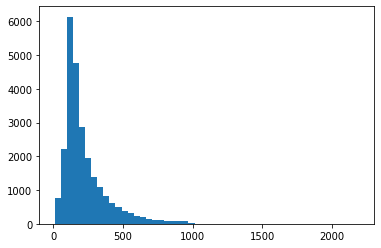

In [25]:
import matplotlib.pyplot as plt

lens = [len(s) for s in seq_train]
_ =plt.hist(lens,bins=50)

In [47]:
row_list = []

In [74]:
output_dim=64

In [75]:
from keras import preprocessing
maxlen = 100
seq_train_padded = preprocessing.sequence.pad_sequences(seq_train, maxlen=maxlen)
seq_test_padded = preprocessing.sequence.pad_sequences(seq_test, maxlen=maxlen)

Examples of padded sequences

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   11    6    1  240    4   19   15    3 8775 2706 2652   51    1
  357    4    1  179   67  137 1400   16   91  202  967   14   22   80
    3  191 3108 3036    2   15    3  375    4  631  386  351   36 6354
    2 5558 1927   14  207 8595 3432    1  111  364   47   23   54    5
 1656   54 1817 4311   40    3 2262    2 1907  140  159  779  110   30
   91  115    3  220   19    8  172  278    2   28   12 1011    1 2813
    9 1984]


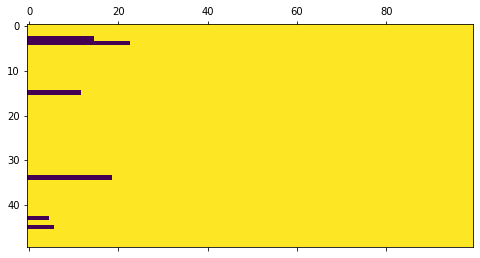

In [76]:
import matplotlib.pyplot as plt
print(seq_train_padded[3])
sub_seq = seq_train_padded[0:50,:]
sub_seq=np.where(sub_seq>0,1,0)
_=plt.matshow(sub_seq,cmap=None)



## Classifier

We define the network architecture. Please observe the number of parameters for the Embedding layer. It is equal to the numeber of words multiplied by the size of embedding vectors

In [77]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()
# We specify the maximum input length to our Embedding layer, so we can later flatten the embedded inputs
model.add(Embedding(input_dim=10_000, output_dim=64, input_length=maxlen))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# Finally, we add the classifier on top
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 64)           640000    
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 12802     
                                                                 
Total params: 652,802
Trainable params: 652,802
Non-trainable params: 0
_________________________________________________________________


Train the model

In [78]:
hist = model.fit(seq_train_padded, df_train.label,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 4s 6ms/step - loss: 0.4614 - acc: 0.7753 - val_loss: 0.3272 - val_acc: 0.8562
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2408 - acc: 0.9059 - val_loss: 0.3375 - val_acc: 0.8562
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.1367 - acc: 0.9565 - val_loss: 0.3473 - val_acc: 0.8542
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0568 - acc: 0.9864 - val_loss: 0.3818 - val_acc: 0.8482
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0167 - acc: 0.9976 - val_loss: 0.4394 - val_acc: 0.8460
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0041 - acc: 0.9995 - val_loss: 0.5151 - val_acc: 0.8434
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.6000 - val_acc: 0.8428
Epoch 8/20
625/625 [==============================] - 4s 6ms/step - loss: 3.

**TODO 6.4.1** make predictions and print classification scores

In [79]:
probs = model.predict(seq_test_padded)
y_pred = np.argmax(probs,axis=1)
df = classification_report(y_pred,df_test.label,output_dict=True)
print( classification_report(y_pred,df_test.label))
row_list.append([maxlen, output_dim,df['0']['precision'],df['0']['recall'],df['0']['f1-score']])

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12609
           1       0.83      0.84      0.84     12391

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



**TODO 6.4.2** Repeat experiments for various values of lengths of input sequence ```maxlen in [100,250,500]``` and dimensions of embeddings ```output_dim in [8, 32, 64]```. Present results in a table (markdown or data frame)


In [80]:
import pandas as pd
df = pd.DataFrame(row_list,columns=['maxlen', 'ouput_dim', 'precision', 'recall', 'f1'])
df.head(df.size)

,maxlen,ouput_dim,precision,recall,f1
0,100,8,0.82688,0.813218,0.819992
1,250,8,0.86408,0.838001,0.850841
2,500,8,0.85048,0.825004,0.837548
3,100,32,0.82936,0.835577,0.832457
4,100,64,0.84296,0.835673,0.839301


# 6.5 Using Glove embeddings

We will download embeddings obtained by training on large text corpora and try to use them as weights of Embdedding layer. 

We will use [gensim](https://radimrehurek.com/gensim/) library providing a number of pretrained embeddings models. 

In [81]:
import gensim
import gensim.downloader as api

nlp = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


Check the dimension of an embedding vector

In [82]:
embedding = nlp['film']
print(type(embedding))
print(embedding.shape)


<class 'numpy.ndarray'>
(100,)


Using gensim you may easily compute distance between terms by computing distance between embeddings.

In [83]:
print(nlp.distance("film","movie"))

0.09448784589767456


**TODO 6.5.1** Prepare 10 pairs of words, for which you expect certain similartity and display their distance based on embeddings.

In [84]:
words=[
       ["film","movie"],
       ["actor","cast"],
       ["house","building"],
       ["sky","cloud"],
       ["pen","pencil"],
       ["lamp","lantern"],
       ["thief","criminal"],
       ["phone","iphone"],
       ["fan","ventilator"],
       ["mom","dad"]
]

for pair in words:
  print(f'{pair[0]}\t{pair[1]}: {nlp.distance(pair[0],pair[1])}')

film	movie: 0.09448784589767456
actor	cast: 0.32412874698638916
house	building: 0.315271258354187
sky	cloud: 0.38010847568511963
pen	pencil: 0.3898542523384094
lamp	lantern: 0.4299100637435913
thief	criminal: 0.669954925775528
phone	iphone: 0.49603867530822754
fan	ventilator: 0.9688261300325394
mom	dad: 0.13732701539993286


## Weights matrix for Embedding layer

Building the weights matrix we must consider two elements:
*  vocabulary used by tokenizer (limited to a certain number of words)
*  mapping from words to embeddings within gensim

Small test performed on a list of three strings

In [85]:
tok = Tokenizer(num_words=4)
texts = np.array(["apple big cat","cat dog apple","apple eat dog dog dog"])
tok.fit_on_texts(texts)
print(tok.word_counts)
print(tok.word_index)
seq = tok.texts_to_sequences(texts)
print(seq)

OrderedDict([('apple', 3), ('big', 1), ('cat', 2), ('dog', 4), ('eat', 1)])
{'dog': 1, 'apple': 2, 'cat': 3, 'big': 4, 'eat': 5}
[[2, 3], [3, 1, 2], [2, 1, 1, 1]]


As num_wors=4, only three words were used (index 0 is reserved for padding). They were selected based on frequency (the most frequent 3 words are dog, apple and cat).

Below the function to build weights matrix. Embeddings are arranged as rows.

In [86]:
# dict maps words to indexes
# nlp is gensim wrapper mapping word to embedding vector

def prepare_embedding_weights(dict,nlp,input_dim=10_000, output_dim=100):
  weights = np.zeros((input_dim,output_dim) )
  
  for word in dict:
    idx = dict[word]
    if idx==input_dim:
      break
    if word in nlp.vocab:
      embedding = nlp[word]
    else:
      continue
    # print(embedding)
    length = min(len(embedding),output_dim)
    weights[idx,:length]=embedding[:length]

  return weights

weights = prepare_embedding_weights(tok.word_index,nlp,input_dim=4, output_dim=50) 
print(weights.shape)

(4, 50)


## Model preparation

We set the embedding layer as trainable. This can be switched off with:

```embedding_layer = Embedding(input_dim=10_000, output_dim=100, input_length=maxlen,weights=[weights],trainable=False)```


In [87]:
import tensorflow as tf

model = Sequential()
# We specify the maximum input length to our Embedding layer, so we can later flatten the embedded inputs
weights = prepare_embedding_weights(tokenizer.word_index,nlp,input_dim=10_000, output_dim=100)
embedding_layer = Embedding(input_dim=10_000, output_dim=100, input_length=maxlen,weights=[weights],
                            trainable=True)
model.add(embedding_layer)
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())
# model.add(Dense(512, activation='relu'))

# Finally, we add the classifier on top
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.5), loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 20002     
                                                                 
Total params: 1,020,002
Trainable params: 1,020,002
Non-trainable params: 0
_________________________________________________________________


## Training and testing 

Actually, we fine-tune embeddings. Results for frozen embeddings are much worse.

In [88]:
hist = model.fit(seq_train_padded, df_train.label,
                    epochs=2,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 5s 8ms/step - loss: 1867.0658 - acc: 0.7043 - val_loss: 2523.4614 - val_acc: 0.7440
Epoch 2/2
625/625 [==============================] - 6s 9ms/step - loss: 1828.1738 - acc: 0.8557 - val_loss: 4169.5591 - val_acc: 0.7790


**TODO 6.5.2** Make predictions, compute labels and print classification report

In [91]:
probs = model.predict(seq_test_padded)
y_pred = np.argmax(probs,axis=1)
print( classification_report(y_pred,df_test.label))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     12086
           1       0.79      0.77      0.78     12914

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



The code below displays sequence, padded sequence, performs classification and determines the predicted label. 

**TODO 6.5.3** Try it yourself. Perpare 10 sentences and display predicted labels. Gather them in a table. Write a short comment to the results.

In [92]:
text_instance=df_train.text[3]
text_instance='great film nice scenario'
text_instance='surprising action great play'
text_instance='i was expecting something better'

seq = tokenizer.texts_to_sequences([text_instance])
print(seq)
seq_padded = preprocessing.sequence.pad_sequences(seq, maxlen=maxlen) 
print(seq_padded)
probs = model.predict(seq_padded)
print(probs)
y_pred = np.argmax(probs,axis=1)
print(y_pred)


[[10, 13, 1014, 139, 125]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   10   13 1014
   139  125]]
[[1. 0.]]
[0]


In [104]:
import pandas as pd
sentences = ["Beautiful  movie",
 "Terrible movie, wouldn't recommend to anybody",
 "a truly great piece of cinematography",
 "I cried from laughing",
 "two out of ten",
 "Best movie ever",
 "What was even that? garbage",
 "Kinda boring at the start but ending was just beautiful",
 "This film is a must watch",
 "How did someone manage to mess it up?"]
row_list = []

for sentence in sentences:
  seq = tokenizer.texts_to_sequences([sentence])
  seq_padded = preprocessing.sequence.pad_sequences(seq, maxlen=maxlen)
  probs = model.predict(seq_padded)
  y_pred = np.argmax(probs,axis=1)
  row_list.append([sentence, y_pred])

df = pd.DataFrame(row_list,columns=['Sentence', 'Predicted label'])
df.head(df.size)

,Sentence,Predicted label
0,Beautiful movie,[0]
1,"Terrible movie, wouldn't recommend to anybody",[0]
2,a truly great piece of cinematography,[0]
3,I cried from laughing,[0]
4,two out of ten,[0]
5,Best movie ever,[1]
6,What was even that? garbage,[0]
7,Kinda boring at the start but ending was just ...,[0]
8,This film is a must watch,[1]
9,How did someone manage to mess it up?,[0]


In [105]:
#Model havent even labeled very easy sentences like "Beautiful movie" or "a truly great piece of cinematography"
#which suggest that it is still very random

In [107]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py

--2022-04-18 15:17:44--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-04-18 15:17:44 (13.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]



In [109]:
from colab_pdf import colab_pdf
colab_pdf('CI_lab_6.ipynb')





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CI_lab_6.ipynb to pdf
[NbConvertApp] Support files will be in CI_lab_6_files/
[NbConvertApp] Making directory ./CI_lab_6_files
[NbConvertApp] Making directory ./CI_lab_6_files
[NbConvertApp] Making directory ./CI_lab_6_files
[NbConvertApp] Making directory ./CI_lab_6_files
[NbConvertApp] Writing 1753532 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1316553 bytes to /content/drive/My Drive/CI_lab_6.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'